In [ ]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt
import time
from telemetrix import telemetrix
import time



RGB_LED_RED_PIN = 6
RGB_LED_GREEN_PIN = 3
RGB_LED_BLUE_PIN = 5
SERVO_MOTOR_PIN = 10
BUTTON_PIN = 13
BUZZER_PIN = 11

lis=['Beyonce.jpg', '6.jpg', 'EmmaRoberts.jpg']



board = telemetrix.Telemetrix()

board.set_pin_mode_digital_output(RGB_LED_RED_PIN)
board.set_pin_mode_digital_output(RGB_LED_GREEN_PIN)
board.set_pin_mode_digital_output(RGB_LED_BLUE_PIN)

# Set up the DC Motor pin as a digital output
board.set_pin_mode_servo(SERVO_MOTOR_PIN, 100, 3000)


def buzz(pin, frequency, duration):
    # Calculate the delay value
    delay = 1 / frequency / 2

    # Calculate the number of cycles for the duration
    cycles = int(duration * frequency)

    # Make the buzzer sound
    for i in range(cycles):
        # Set the buzzer pin to HIGH
        board.digital_write(pin, 1)
        # Wait for half a cycle
        time.sleep(delay)
        # Set the buzzer pin to LOW
        board.digital_write(pin, 0)
        # Wait for half a cycle
        time.sleep(delay)
        
        

def set_rgb_led_color(red, green, blue):
    # Set the RGB LED color
    board.digital_write(RGB_LED_RED_PIN, red)
    board.digital_write(RGB_LED_GREEN_PIN, green)
    board.digital_write(RGB_LED_BLUE_PIN, blue)
    
    
    
def the_callback(data):
    """
    data: [pin, current reported value, pin_mode, timestamp]
    """
    date = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(data[CB_TIME]))
    print(f'Pin: {data[CB_PIN]} Value: {data[CB_VALUE]} Time Stamp: {date}')
    value = data[CB_VALUE]
    if value == 0:
        print('LED ON')
        board.digital_write(LED_PIN, 1)
    else:
        print('LED OFF')
        board.digital_write(LED_PIN, 0)
    time.sleep(WAIT_TIME)    

    
def faceCV(image):
    # Enter the paths for your image and cascade files here
    imagePath = image
    labelsPath = 'labels.pickle'

    # Create the haar cascade (XML file that contains the data to detect faces)
    faceCascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml') #Face Classifier

    # Create the recognizer
    recognizer = cv.face.LBPHFaceRecognizer_create()
    # Import the training data for the recognizer
    recognizer.read("trainer.yml")

    # Import the labels created by the facesTrain program
    labels = {}
    with open("labels.pickle", 'rb') as pickleFile:
        original_labels = pickle.load(pickleFile)
        #invert the order:
        labels = {v:k for k, v in original_labels.items()}

    # Read the image
    image = cv.imread(imagePath)
    image_RGB= cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.title("Original Image")
    plt.imshow(image_RGB) # open the image as RGB
    plt.xticks([]),plt.yticks([])
    plt.show()

    #Transform the image to Grayscale
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    plt.title("Gray Image")
    plt.imshow(gray, cmap='gray') # open the image as RGB
    plt.xticks([]),plt.yticks([])
    plt.show()

    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.21, #1.25
        minNeighbors=4, #5
        minSize=(20, 20), #30, 30
        flags = cv.CASCADE_SCALE_IMAGE
    )
    print(faces)

    #print "Found {0} faces!".format(len(faces))
    print('Faces found: ', len(faces))

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv.rectangle(image_RGB, (x, y), (x+w, y+h), (0, 255, 0), 5)
        roi_gray = gray[y:y+h, x:x+w]
        id_now, confidence = recognizer.predict(roi_gray)
        print("detected = ", labels[id_now])
        print("confidence = ", confidence)

    plt.title("Faces Found")
    plt.imshow(image_RGB) # open the image as RGB
    plt.xticks([]),plt.yticks([])
    plt.show()
    if labels[id_now]==3:
        return True 
    else:
        return False
    
    
    


for i in lis:
    board.servo_write(SERVO_MOTOR_PIN, 180)
    set_rgb_led_color(0 , 255, 0)
    time.sleep(5)
    if faceCV(i)==False:
        set_rgb_led_color(255, 0, 0)  # RED
        buzz(buzzer_pin, 1000, 3)
        
    else:
        set_rgb_led_color(0, 255, 0)  # GREEN
        board.servo_write(SERVO_MOTOR_PIN, 90)
        
        
    
    
    my_board.set_pin_mode_digital_input_pullup(pin, callback=the_callback)
    
    




Telemetrix:  Version 1.39

Copyright (c) 2021 Alan Yorinks All Rights Reserved.

Opening all potential serial ports...
	/dev/cu.usbmodem1401

Waiting 4 seconds(arduino_wait) for Arduino devices to reset...
Valid Arduino ID Found.
Arduino compatible device found and connected to /dev/cu.usbmodem1401
Waiting for Arduino to reset
Reset Complete

Retrieving Telemetrix4Arduino firmware ID...
Telemetrix4Arduino firmware version: 5.3.3


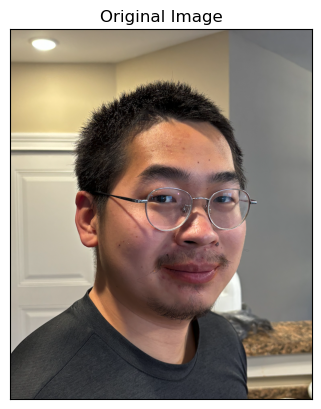

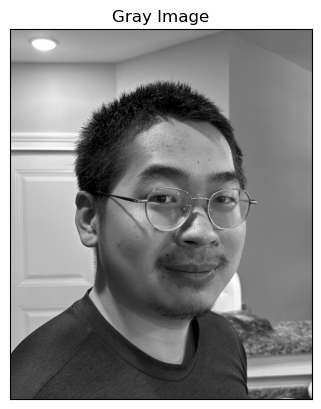

[[187 209 413 413]]
Faces found:  1
detected =  4
confidence =  91.46750092681793


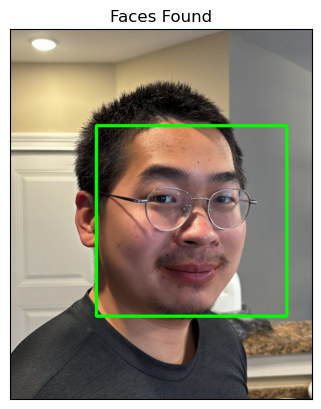

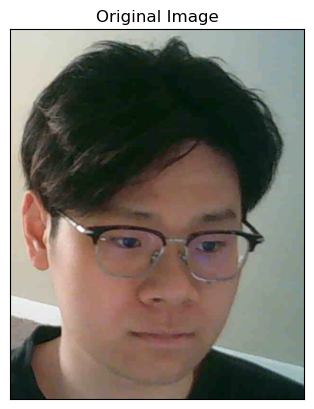

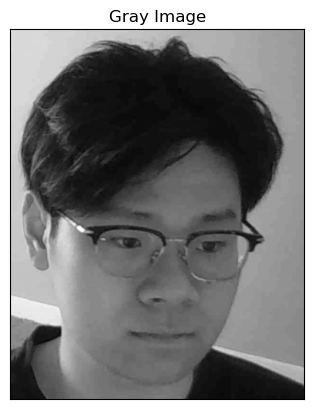

[[ 92 178 239 239]]
Faces found:  1
detected =  3
confidence =  28.652167490491006


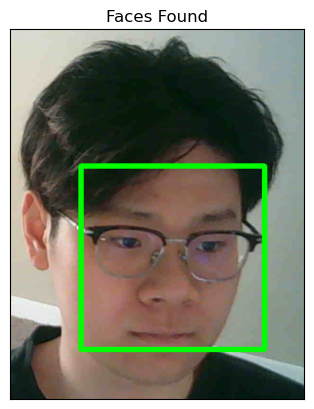

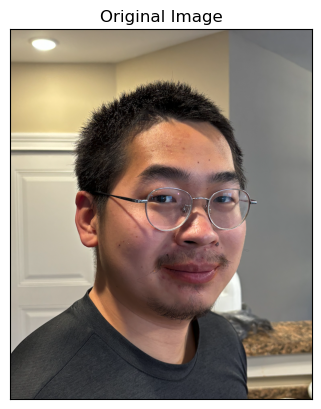

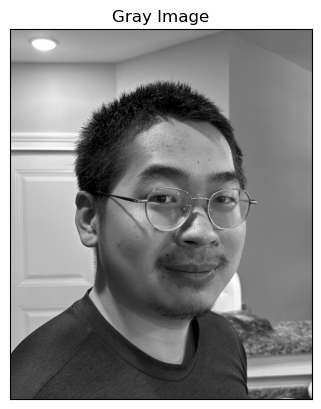

[[187 209 413 413]]
Faces found:  1
detected =  4
confidence =  91.46750092681793


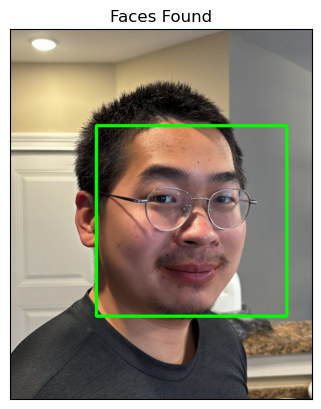

In [ ]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt
import time
from telemetrix import telemetrix
import time
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt
import time
from telemetrix import telemetrix
import sys
import numpy as np
import os
import cv2 as cv
from matplotlib import pyplot as plt
import pickle
import pygame
import numpy as np

# Initialize pygame mixer
pygame.mixer.init(frequency=22050, size=-16, channels=2)

# Create a simple sound with a given frequency (Hz) and duration (milliseconds)
def play_tone(frequency, duration):
    # Create an array with sine wave samples at the given frequency
    sample_rate = 22050  # Sample rate used by pygame.mixer
    n_samples = int(round(duration * sample_rate / 1000.0))
    buf = np.zeros((n_samples, 2), dtype=np.int16)
    max_sample = 2**(16 - 1) - 1
    for s in range(n_samples):
        t = float(s) / sample_rate  # Time index
        buf[s][0] = int(round(max_sample * np.sin(2 * np.pi * frequency * t)))  # Left channel
        buf[s][1] = int(round(max_sample * np.sin(2 * np.pi * frequency * t)))  # Right channel

    sound = pygame.sndarray.make_sound(buf)
    sound.play(-1)  # The -1 means to loop the sound
    pygame.time.delay(duration)
    sound.stop()


RGB_LED_RED_PIN = 6
RGB_LED_GREEN_PIN = 3
RGB_LED_BLUE_PIN = 5
SERVO_MOTOR_PIN = 10
BUTTON_PIN = 13
BUZZER_PIN = 11

lis=['7.jpg', '6.jpg', '7.jpg', '7.jpg']



board = telemetrix.Telemetrix()

board.set_pin_mode_digital_output(RGB_LED_RED_PIN)
board.set_pin_mode_digital_output(RGB_LED_GREEN_PIN)
board.set_pin_mode_digital_output(RGB_LED_BLUE_PIN)

# Set up the DC Motor pin as a digital output
board.set_pin_mode_servo(SERVO_MOTOR_PIN, 100, 3000)


def buzz(pin, frequency, duration):
    # Calculate the delay value
    delay = 1 / frequency / 2

    # Calculate the number of cycles for the duration
    cycles = int(duration * frequency)

    # Make the buzzer sound
    for i in range(cycles):
        # Set the buzzer pin to HIGH
        board.digital_write(pin, 1)
        # Wait for half a cycle
        time.sleep(delay)
        # Set the buzzer pin to LOW
        board.digital_write(pin, 0)
        # Wait for half a cycle
        time.sleep(delay)
        
        

def set_rgb_led_color(red, green, blue):
    # Set the RGB LED color
    board.digital_write(RGB_LED_RED_PIN, red)
    board.digital_write(RGB_LED_GREEN_PIN, green)
    board.digital_write(RGB_LED_BLUE_PIN, blue)
    
    

    
def faceCV(image):
    # Enter the paths for your image and cascade files here
    imagePath = image
    labelsPath = 'labels.pickle'

    # Create the haar cascade (XML file that contains the data to detect faces)
    faceCascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml') #Face Classifier

    # Create the recognizer
    recognizer = cv.face.LBPHFaceRecognizer_create()
    # Import the training data for the recognizer
    recognizer.read("trainer.yml")

    # Import the labels created by the facesTrain program
    labels = {}
    with open("labels.pickle", 'rb') as pickleFile:
        original_labels = pickle.load(pickleFile)
        #invert the order:
        labels = {v:k for k, v in original_labels.items()}

    # Read the image
    image = cv.imread(imagePath)
    image_RGB= cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.title("Original Image")
    plt.imshow(image_RGB) # open the image as RGB
    plt.xticks([]),plt.yticks([])
    plt.show()

    #Transform the image to Grayscale
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    plt.title("Gray Image")
    plt.imshow(gray, cmap='gray') # open the image as RGB
    plt.xticks([]),plt.yticks([])
    plt.show()

    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.21, #1.25
        minNeighbors=4, #5
        minSize=(20, 20), #30, 30
        flags = cv.CASCADE_SCALE_IMAGE
    )
    print(faces)

    #print "Found {0} faces!".format(len(faces))
    print('Faces found: ', len(faces))

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv.rectangle(image_RGB, (x, y), (x+w, y+h), (0, 255, 0), 5)
        roi_gray = gray[y:y+h, x:x+w]
        id_now, confidence = recognizer.predict(roi_gray)
        print("detected = ", labels[id_now])
        print("confidence = ", confidence)

    plt.title("Faces Found")
    plt.imshow(image_RGB) # open the image as RGB
    plt.xticks([]),plt.yticks([])
    plt.show()
    
    if int(labels[id_now])==3:
        return True 
    else:
        return False
    
    
button_pressed = False
def button_callback(data):
    global button_pressed
    if data[2] == 0:  # Check if button is pressed (LOW because of the pull-up resistor)
        button_pressed = True
board.set_pin_mode_digital_input_pullup(BUTTON_PIN, callback=button_callback)
def wait_for_button_press():
    global button_pressed
    while not button_pressed:
        time.sleep(0.1)  # Sleep to prevent busy-waiting
    button_pressed = False  # Reset the button state for the next check    


for i in lis:
    board.servo_write(SERVO_MOTOR_PIN, 180)
    set_rgb_led_color(0 , 255, 0)
    time.sleep(5)
    if faceCV(i)==False:
        set_rgb_led_color(255, 0, 0)  # RED
        play_tone(750, 1000)



        wait_for_button_press()
        
    else:
        set_rgb_led_color(0, 0, 255)  # GREEN
        board.servo_write(SERVO_MOTOR_PIN, 90)
        wait_for_button_press()
        
        
    
pygame.quit()


In [29]:
import pygame
import numpy as np

# Initialize pygame mixer
pygame.mixer.init(frequency=22050, size=-16, channels=2)

# Create a simple sound with a given frequency (Hz) and duration (milliseconds)
def play_tone(frequency, duration):
    # Create an array with sine wave samples at the given frequency
    sample_rate = 22050  # Sample rate used by pygame.mixer
    n_samples = int(round(duration * sample_rate / 1000.0))
    buf = np.zeros((n_samples, 2), dtype=np.int16)
    max_sample = 2**(16 - 1) - 1
    for s in range(n_samples):
        t = float(s) / sample_rate  # Time index
        buf[s][0] = int(round(max_sample * np.sin(2 * np.pi * frequency * t)))  # Left channel
        buf[s][1] = int(round(max_sample * np.sin(2 * np.pi * frequency * t)))  # Right channel

    sound = pygame.sndarray.make_sound(buf)
    sound.play(-1)  # The -1 means to loop the sound
    pygame.time.delay(duration)
    sound.stop()

# Play a 750 Hz tone for 1000 milliseconds (1 second)
play_tone(750, 1000)

# Quit pygame
pygame.quit()

